<h1>Index</h1>
    <ul>
        <li><a href="eda">Exploratory Analytics</a>
            <ul>
                <li><a href="#final_score_analysis">Analisi del voto</a></li>
                <li><a href="#correlation">Correlazione col voto finale</a></li>
                <li><a href="#variables_analysis">Analisi delle features</a>
                    <ul>
                        <li><a href="#personal">Dati Anagrafici</a></li>
                        <li><a href="#school">Istituti Scolastici</a></li>
                        <li><a href="#family">Ambiente Familiare</a></li>
                        <li><a href="#time_management">Gestione del Tempo</a></li>
                        <li><a href="#alchol">Consumo di Alcolici</a></li>
                        <li><a href="#other_analysis">Ulteriori Analisi</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><a href="pa">Predictive Analytics</a>
            <ul>
                <li><a href="#reduce_dim">Riduzione della Dimensionalità</a></li>
                <li><a href="#train">Ottimizzazione dei Parametri e Addestramento</a></li>
                <li><a href="#valutation">Valutazione dei Modelli e degli Errori</a></li>
                <li><a href="#f_importance">Importanza delle features</a></li>
            </ul>
        </li>
    </ul>

In [9]:
# import library 

import warnings
import pandas as pd
import numpy as np
import time
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from scipy.stats import randint, uniform

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

# for screenshot diagrams
import plotly.io as pio


<h1><a id="eda">Exploratory Analytics</a></h1>

Sarà eseguito un EDA al fine di individuare i fattori che influenzano maggiormente i risultati scolastici. 

In [10]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [11]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [12]:
por.shape

(649, 33)

In [13]:
len(por[por.duplicated()])

0

In [14]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<h3><a id="final_score_analysis">Analisi del voto</a></h3>

L'analisi del voto finale mira a comprendere la distribuzione e le caratteristiche dei voti ottenuti dagli studenti. 

In [16]:
print("Grade point mean: ", round(por.G3.mean(), 2))

Grade point mean:  11.91


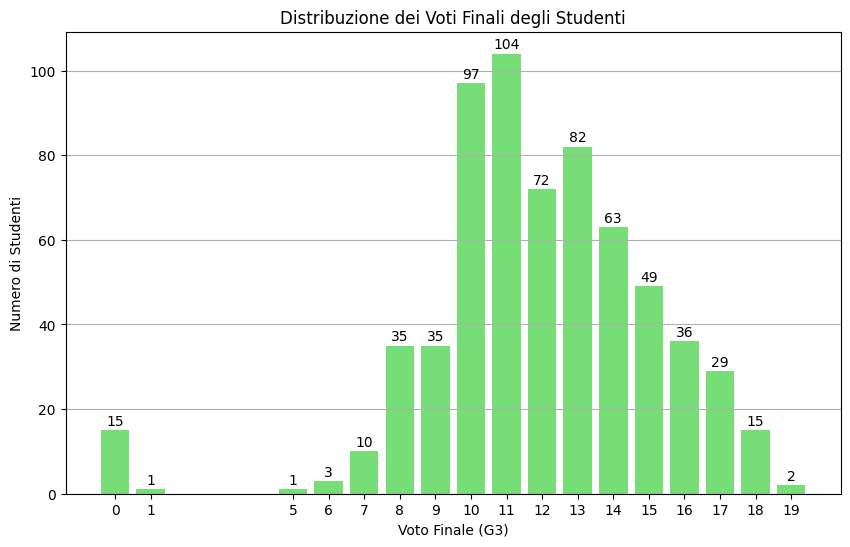

In [17]:
# Calculate the number of students for each distinctive grade
voti_distinti = sorted(por['G3'].unique())  # Ottieni i voti distinti e ordina
numero_studenti = por['G3'].value_counts().sort_index()  # Conta il numero di studenti per ciascun voto e ordina per voto

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(voti_distinti, numero_studenti, color='#77DD77')

for bar, count in zip(bars, numero_studenti):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Voto Finale (G3)')
plt.ylabel('Numero di Studenti')
plt.title('Distribuzione dei Voti Finali degli Studenti')
plt.xticks(voti_distinti)
plt.grid(axis='y')
plt.show()

Binning della variabile 'G3' per rendere più leggibile l'andamento dei voti

In [18]:
bins = [0, 4, 8, 12, 16, 20]
labels = ['Ottimo' , 'Buono', 'Sufficiente', 'Mediocre', 'Scarso']

por['score_range'] = pd.cut(por['G3'], bins=bins, labels=labels, right=False)

# Calculate the percentage of students in each band
percentage_range = por['score_range'].value_counts(normalize=True) * 100
percentage_range = percentage_range.reindex(labels)

pal = sns.color_palette("RdYlGn", len(labels))

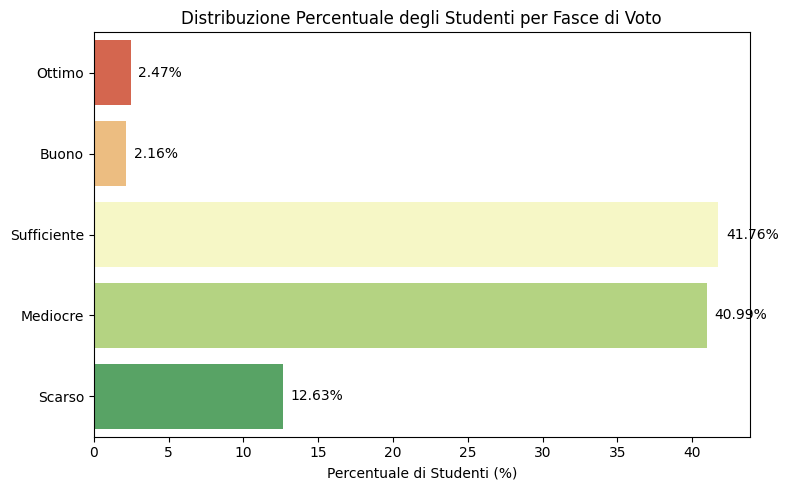

In [19]:
# Create plot
plt.figure(figsize=(8, 5))

sns.barplot(x=percentage_range.values, y=percentage_range.index, hue=percentage_range.index, palette=pal)

plt.xlabel('Percentuale di Studenti (%)')
plt.ylabel('')
plt.title('Distribuzione Percentuale degli Studenti per Fasce di Voto')

for i in range(len(percentage_range)):
    plt.text(percentage_range.values[i] + 0.5, i, f'{percentage_range.values[i]:.2f}%', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [20]:
por = por.drop(labels='score_range', axis=1)

<h3><a id="correlation">Correlazione col voto finale</a></h3>

Data la grande quantità di variabili categoriche, è stata effettuata un encoding di queste prima di generare la matrice di correlazione, che sarà lo strumento che permetterà di valutare come il voto finale degli studenti sia correlato con altre variabili nel dataset.

##### Data Encoding

Per preparare i dati per l'analisi, è stato necessario convertire le variabili categoriche in un formato numerico utilizzabile dagli algoritmi di machine learning.
- LabelEncoder: Utilizzato per variabili categoriche binarie
- OneHotEncoder: Utilizzato per variabili categoriche nominali

In [21]:
por_enc = por.copy()

In [22]:
label_encoders = {}
onehot_encoders = {}
mapping = {}

In [23]:
categorical_columns = por_enc.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por_enc.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [24]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por_enc[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por_enc = pd.concat([por_enc, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por_enc.drop(columns=[col], inplace=True)

In [25]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por_enc[col] = label_encoders[col].fit_transform(por_enc[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

##### Final Score (G3) - Correlation

In [26]:
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)

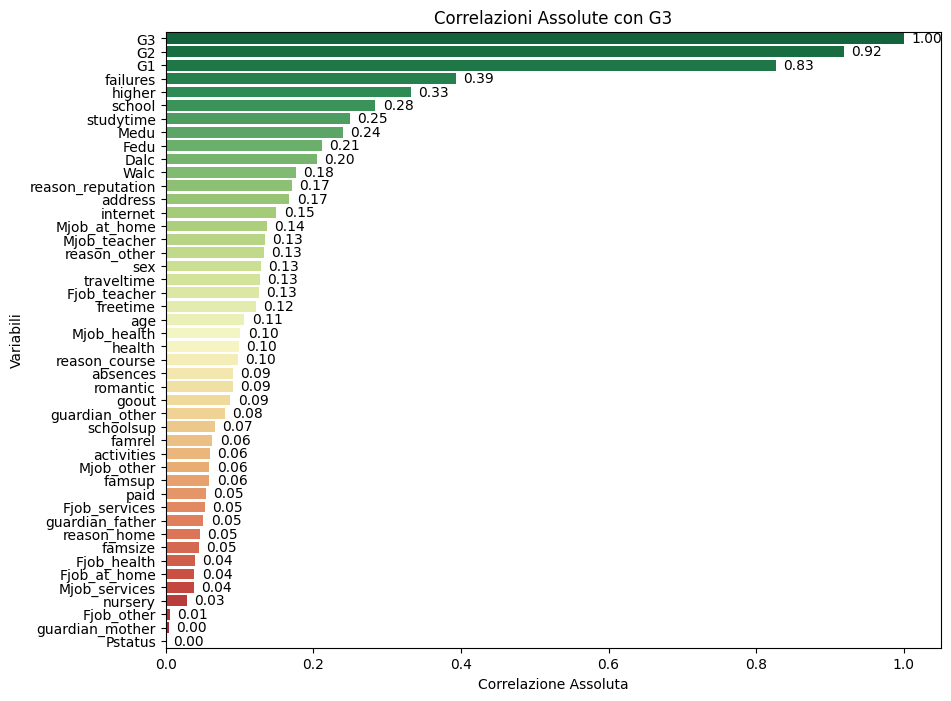

In [27]:
#Create plot
plt.figure(figsize=(10, 8))

palette = sns.color_palette("RdYlGn", len(g3_correlations_abs))

sns.barplot(x=g3_correlations_abs.values, y=g3_correlations_abs.index, hue=g3_correlations_abs.index, orient='h', palette=palette[::-1])
plt.title('Correlazioni Assolute con G3')
plt.xlabel('Correlazione Assoluta')
plt.ylabel('Variabili')

for i, v in enumerate(g3_correlations_abs):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.show()

<h3><a id="variables_analysis">Analisi delle features</a></h3>

L'analisi della relazione del voto con le altre variabili del dataset


<h5><a id="personal">Dati Anagrafici</a></h5>

In [28]:
print("Media voti per sesso\n ", por.groupby("sex")["G3"].agg(["mean", "count"]))


Media voti per sesso
            mean  count
sex                  
F    12.253264    383
M    11.406015    266


In [29]:
# Calculate your children's grade point average for each combination of age and gender
mean_scores = por.groupby(["age", "sex"])["G3"].mean().unstack()

# Calculate the number of students by age and gender
student_count = por.groupby(["age", "sex"]).size().unstack()

# Check for existence of NaN values ​​and replace them with 0
mean_scores = mean_scores.fillna(0)
student_count = student_count.fillna(0)

ages = mean_scores.index

In [30]:
# Create trace for bar graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['F'],
    name='F',
    marker_color='#FF6961',
    hoverinfo='y'
))

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['M'],
    name='M',
    marker_color='#A2CFFE',
    hoverinfo='y'
))

# Create trace for the student distribution curves
fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['F'],
    name='Distr F',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='red'),
    hoverinfo='y'
))

fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['M'],
    name='Dist M',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='blue'),
    hoverinfo='y'
))

# Set layout
fig.update_layout(
    title='Average Grades and Student Distribution by Age and Sex',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Average Final Grades'),
    yaxis2=dict(title='total students', overlaying='y', side='right'),
    barmode='group',
    hovermode='x',
    legend=dict(
        x=1.05,
        y=1
    )
)

fig.show()

#fig.write_image("grades_school_analysis.jpg", scale=3)

In [31]:
def boxplot(columns):
    sns.set_theme(style="whitegrid")

    # Calculate the total number of subplots needed
    num_plots = len(columns)
    num_rows = (num_plots - 1) // 3 + 1 

    fig, axes = plt.subplots(num_rows, 3, figsize=(14, num_rows * 5))
    axes = axes.flatten()

    # Create boxplot for each columns
    for i, col in enumerate(columns):
        ax = axes[i]
        sns.boxplot(x=col, y='G3', data=por, ax=ax)
        ax.set_title(f'Distribuzione dei voti (G3) per {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('G3')

    # Remove any unused axes if the number of columns is not a multiple of 3
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

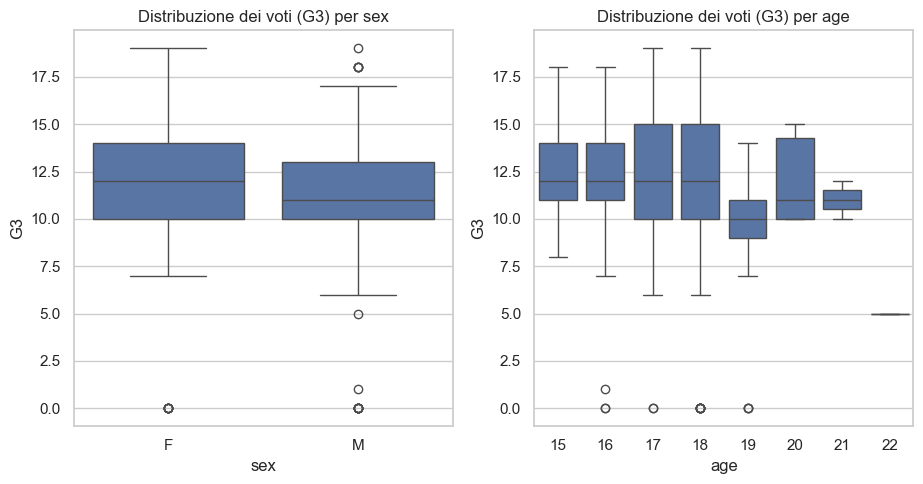

In [32]:
# Create boxplot for specific columns
boxplot_columns = ['sex', 'age'] 

boxplot(boxplot_columns)

<h5><a id="school">Istituti Scolastici</a></h5>

In [33]:
print("Istituti scolastici ", por.school.unique())

Istituti scolastici  ['GP' 'MS']


In [34]:
# grade point average by school
mean_by_school = por.groupby('school')['G3'].mean().reset_index(name='avg_sch')

print(mean_by_school)

  school    avg_sch
0     GP  12.576832
1     MS  10.650442


In [35]:
failed_students_per_school = por[por['failures'] > 1].groupby('school').size().reset_index(name='failed_students')

In [36]:
print(por.groupby('school').size().reset_index(name='counts'))

  school  counts
0     GP     423
1     MS     226


In [37]:
por.groupby('school')['G3'].mean().reset_index(name='avg_sch')

,school,avg_sch
0,GP,12.576832
1,MS,10.650442


In [38]:
# Percentage finale grade by failures by school

failed_students_per_school = por[por['failures'] > 1].groupby('school').size().reset_index(name='failed_students')
total_students_per_school = por.groupby('school').size().reset_index(name='total_students')


school_failures = pd.merge(total_students_per_school, failed_students_per_school, on='school', how='left')
school_failures['failed_students'] = school_failures['failed_students'].fillna(0)

school_failures['failure_percentage'] = (school_failures['failed_students'] / school_failures['total_students']) * 100

print(school_failures)

  school  total_students  failed_students  failure_percentage
0     GP             423               18            4.255319
1     MS             226               12            5.309735


In [39]:
# average number of students who want to continue their studies per school

higher_students = por[por['higher'] == 'yes']
mean_g3_higher = higher_students.groupby('school')['G3'].mean().reset_index(name='mean_G3_by_higher')

print(mean_g3_higher)

  school  mean_G3_by_higher
0     GP          12.861893
1     MS          11.063492


In [40]:
school_report = mean_by_school.merge(school_failures, on="school")
school_report = school_report.merge(mean_g3_higher, on="school")

school_report = school_report.drop(["total_students", "failed_students"], axis=1)
school_report = school_report.rename(columns={"school": "sch", "failure_percentage": "fail_per", "mean_G3_by_higher": "G3_higher"})

numeric_columns = school_report.select_dtypes(include=['float64']).columns
school_report[numeric_columns] = school_report[numeric_columns].round(2)

table = tabulate(school_report, headers='keys', tablefmt='github', showindex=False)

print(table)

| sch   |   avg_sch |   fail_per |   G3_higher |
|-------|-----------|------------|-------------|
| GP    |     12.58 |       4.26 |       12.86 |
| MS    |     10.65 |       5.31 |       11.06 |


In [41]:
# Relationship between school choice and final grade plotly
mean_g3_by_reason = por.groupby(['school', 'reason'])['G3'].mean().unstack()

fig = go.Figure()

bar_width = 0.16 

for reason in mean_g3_by_reason.columns:
    fig.add_trace(go.Bar(
        x=mean_g3_by_reason.index,
        y=mean_g3_by_reason[reason],
        name=reason,
        width=[bar_width] * len(mean_g3_by_reason.index)  # Imposta la larghezza delle barre
    ))

fig.update_layout(
    title='Media dei voti finali rispetto al motivo della scelta della scuola',
    xaxis=dict(title='Scuola'),
    #yaxis=dict(title='Media dei voti finali'),
    barmode='group'
)

# Plot graph
fig.show()

GP: Gli studenti che frequentano GP tendono a ottenere voti finali più alti rispetto a quelli di MS. Inoltre, la percentuale di fallimenti è inferiore, suggerendo un tasso di successo più elevato.
MS: Gli studenti di MS mostrano una media di voti inferiore e una percentuale di fallimenti più alta. Anche il voto finale per coloro che proseguono gli studi è relativamente più basso.

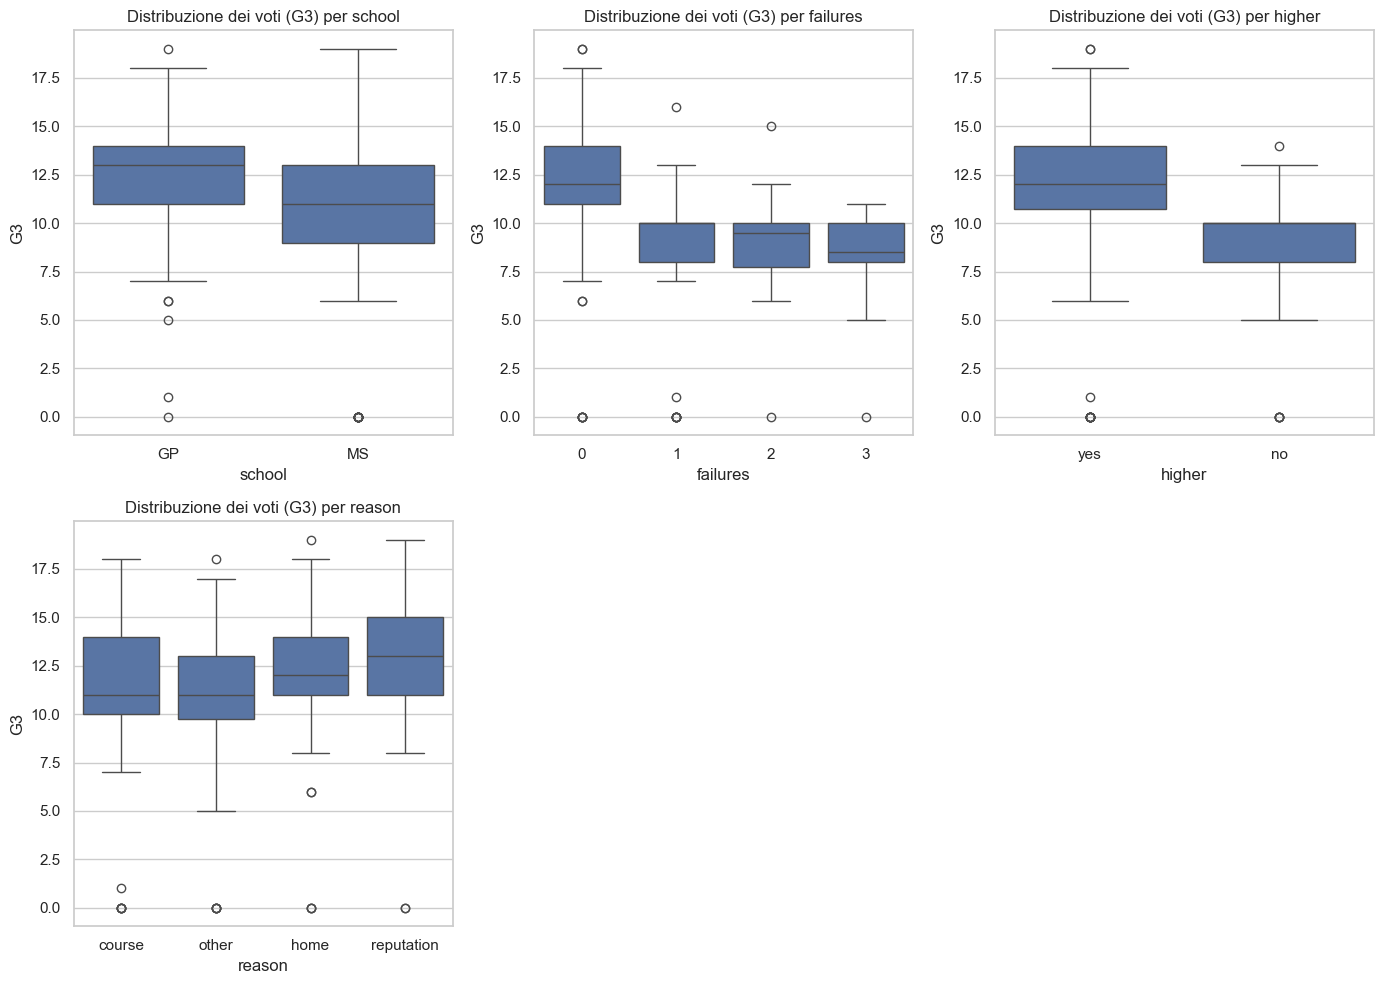

In [42]:
# Create boxplot for specific columns
boxplot_columns = ['school', 'failures', 'higher', 'reason', ] 

boxplot(boxplot_columns)

<h5><a id="family">Ambiente Familiare</a></h5>

A seguire è stato cercato di far emergere come le performance accademiche degli studenti siano influenzate dal contesto familiare, con un focus specifico sulle categorie professionali e sul livello di istruzione dei genitori, notando come i figli di insegnanti abbiano rendimenti scolastici migliori, mentre ii figli dei genitori che lavorano a casa, hanno rendimenti peggiori.

In [43]:
education_levels = np.arange(5)
fedu_mean = por.groupby('Fedu')['G3'].mean()
medu_mean = por.groupby('Medu')['G3'].mean()

bar_width = 0.25
index = np.arange(len(education_levels))

fig = go.Figure()

# Fedu bars
fig.add_trace(go.Bar(
    x=index - bar_width / 2,  # Spostamento per le barre
    y=fedu_mean,
    width=bar_width,
    name='Fedu',
    marker_color='#A2CFFE'
))

# Medu bars
fig.add_trace(go.Bar(
    x=index + bar_width / 2, 
    y=medu_mean,
    width=bar_width,
    name='Medu',
    marker_color='#FF6961'
))

# Plot layout
fig.update_layout(
    title="Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori",
    xaxis_title="Livello d'istruzione dei genitori",
    yaxis_title="Media dei voti dei figli",
    xaxis=dict(
        tickvals=index,
        ticktext=[str(level) for level in education_levels],
        title="Livello d'istruzione dei genitori"
    ),
    barmode='group',
    legend_title="Tipo di Istruzione",
    width=700,
    height=450
)

# Settings bar's labels
for i in range(len(education_levels)):
    fig.add_annotation(
        x=index[i] - bar_width / 2,
        y=fedu_mean[i] + 0.1,
        text=f'{fedu_mean[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )
    fig.add_annotation(
        x=index[i] + bar_width / 2,
        y=medu_mean[i] + 0.1,
        text=f'{medu_mean[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )

fig.show()


In [44]:
fjob_mean = por.groupby('Fjob')['G3'].mean()
mjob_mean = por.groupby('Mjob')['G3'].mean()

# Add 'other' as finally category
job_levels = sorted(por['Fjob'].unique())
if 'other' in job_levels:
    job_levels.remove('other')
    job_levels.append('other')

fjob_mean = fjob_mean.reindex(job_levels, fill_value=0) 
mjob_mean = mjob_mean.reindex(job_levels, fill_value=0)

bar_width = 0.25
index = np.arange(len(job_levels))

fig = go.Figure()

# Fjob bars
fig.add_trace(go.Bar(
    x=index - bar_width / 2,
    y=fjob_mean.values,
    width=bar_width,
    name='Fjob',
    marker_color='#A2CFFE'
))

# Mjob bars
fig.add_trace(go.Bar(
    x=index + bar_width / 2, 
    y=mjob_mean.values,
    width=bar_width,
    name='Mjob',
    marker_color='#FF6961'
))

# Plot layout
fig.update_layout(
    title="Andamento scolastico dei figli rispetto alla professione dei genitori",
    xaxis_title="Professione dei genitori",
    yaxis_title="Media dei voti dei figli",
    xaxis=dict(
        tickvals=index,
        ticktext=job_levels,
        title="Professione dei genitori"
    ),
    barmode='group',
    legend_title="Tipo di Professione", 
    width=750,
    height=500
)

# Settings bar's labels
for i in range(len(job_levels)):
    fig.add_annotation(
        x=index[i] - bar_width / 2,
        y=fjob_mean.iloc[i] + 0.1,
        text=f'{fjob_mean.iloc[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )
    fig.add_annotation(
        x=index[i] + bar_width / 2,
        y=mjob_mean.iloc[i] + 0.1,
        text=f'{mjob_mean.iloc[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )

fig.show()


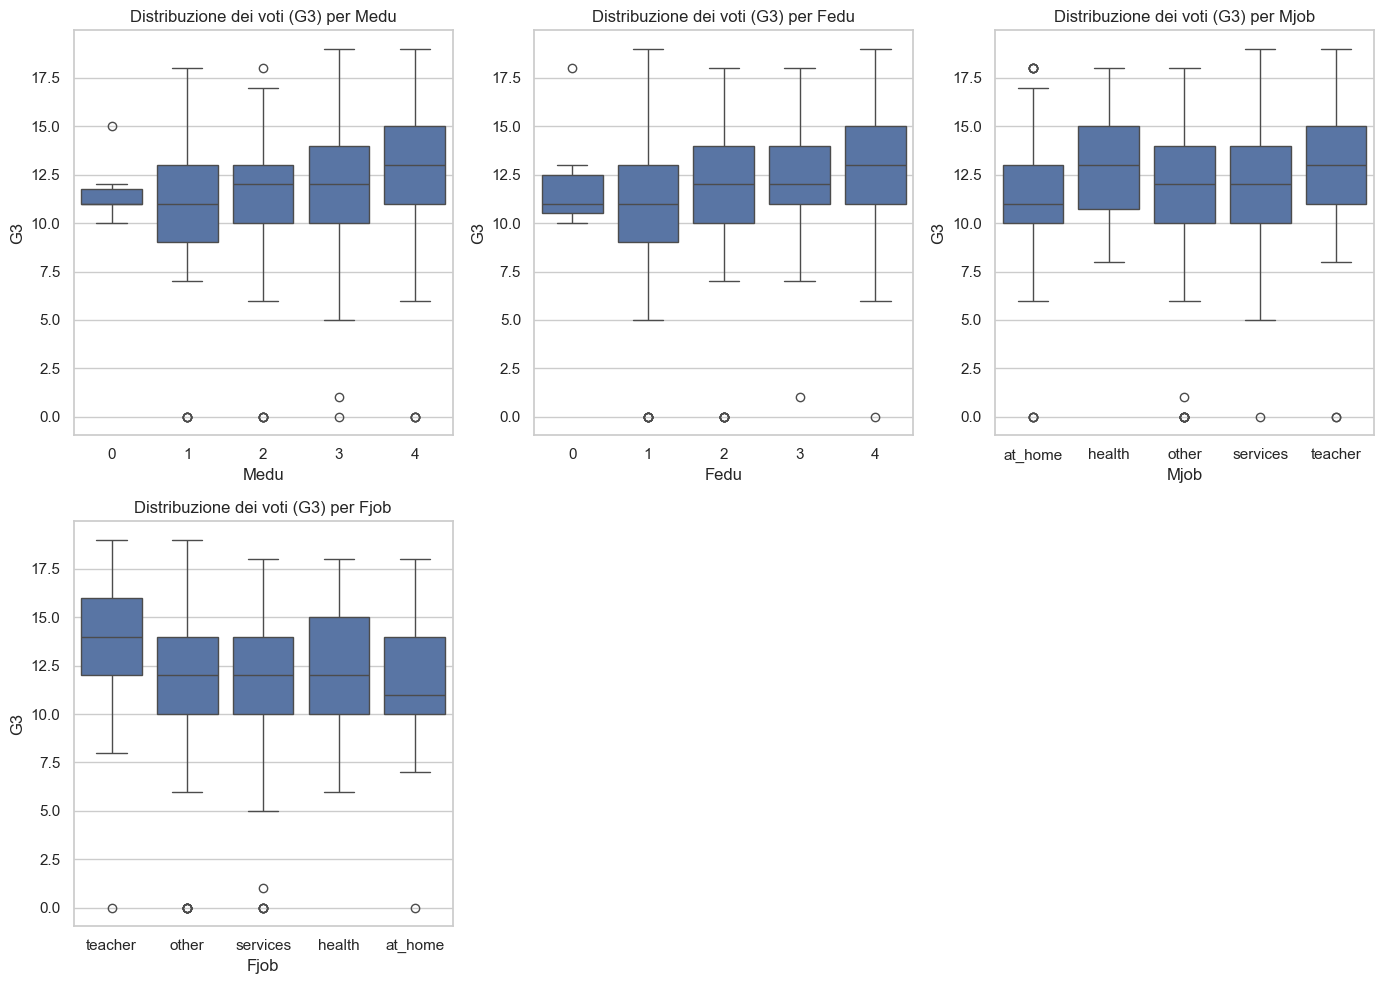

In [45]:
# Create boxplot for specific columns
boxplot_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob'] 

boxplot(boxplot_columns)

<h5><a id="time_management">Gestione del tempo</a></h5>


<p>
Questa sezione, illustra la relazione tra la gestione del tempo da parte degli studenti e il loro rendimento scolastico, misurato in termini di voto finale. 


Utilizzando quattro grafici a linee, sono state analizzate diverse categorie di gestione del tempo: 
<ul>
    <li>tempo dedicato allo studio (studytime)</li>
    <li>tragitto casa-scuola (traveltime)</li>
    <li>tempo libero (freetime)</li>
    <li>uscite con amici (goout)</li>
</ul>

Questi grafici evidenziano:
<ul>
<li>La correlazione positiva tra rendimento scolastico e quantità di studio, purché non si ecceda.</li>
<li>La diminuzione dei voti all'aumentare della distanza tra casa e scuola.</li>
<li>L'importanza del tempo libero e delle uscite con gli amici come validi alleati dell'apprendimento, se gestiti con equilibrio.</li>
</ul>
</p>

In [46]:
time_management_columns = ['studytime', 'traveltime', 'freetime', 'goout']

studytime_labels = ['<2 h', '2-5 h', '5-10 h', '>10 h']
traveltime_labels = ['<15 m', '15-30 m', '30 m-1 h', '>1 h']

# Create plot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Media dei voti finali vs Studytime',
        'Media dei voti finali vs Traveltime',
        'Media dei voti finali vs Freetime',
        'Media dei voti finali vs Goout'
    ],
    horizontal_spacing=0.05, 
    vertical_spacing=0.08
)

axes_map = {
    'studytime': (1, 1),
    'traveltime': (1, 2),
    'freetime': (2, 1),
    'goout': (2, 2)
}

# Generate graphs for each time management column
for col in time_management_columns:
    mean_scores = por.groupby(col)["G3"].mean()
    labels = mean_scores.index

    if col == 'studytime':
        labels = studytime_labels
    elif col == 'traveltime':
        labels = traveltime_labels

    row, col_num = axes_map[col]

    fig.add_trace(go.Scatter(
        x=labels,
        y=mean_scores.values,
        mode='lines+markers',
        name=col.capitalize(),
        text=[f'Media: {val:.2f}' for val in mean_scores.values],
        hoverinfo='text+x'
    ), row=row, col=col_num)

fig.update_layout(
    #title='Media dei voti finali rispetto alla gestione del tempo',
    height=700,
    width=700,
    showlegend=False
)

# reduce font-size annotations
for annotation in fig['layout']['annotations']:
    annotation['font'] = {'size': 11} 

fig.show()


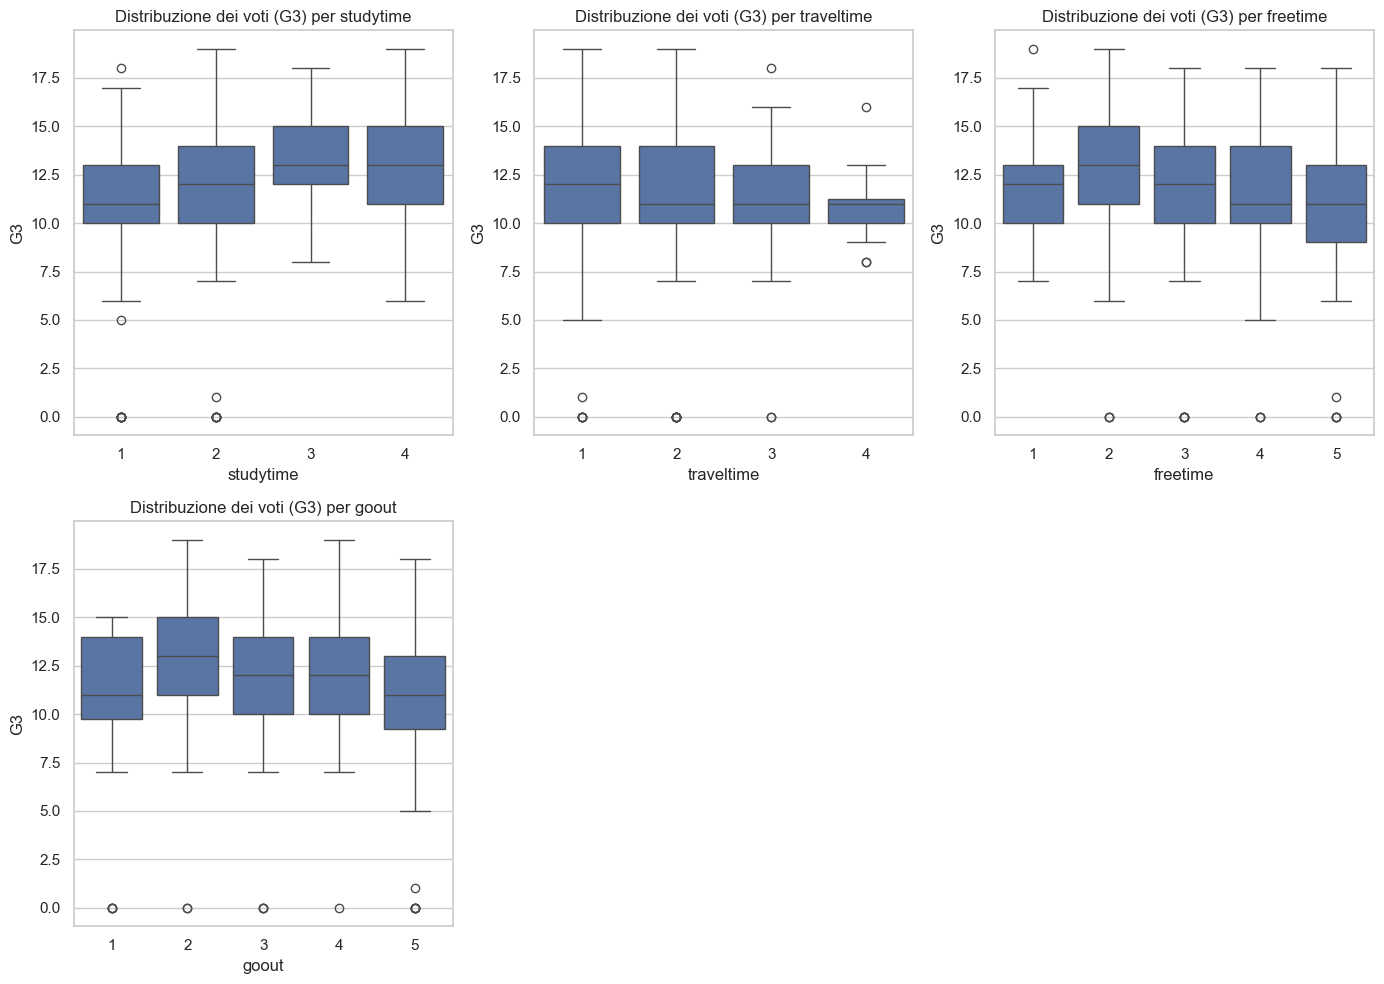

In [47]:
# Create boxplot for specific columns
boxplot_columns = ['studytime', 'traveltime', 'freetime', 'goout'] 

boxplot(boxplot_columns)

<h5><a id="alchol">Consumo di Alcolici</a></h5>

Questa analisi esplora la relazione tra il consumo di alcol nei giorni feriali e festivi e le medie dei voti finali. 
L'analisi mostra che il consumo di alcol durante i giorni infrasettimanali è associato a voti finali più bassi rispetto al consumo nel weekend: questo indica un impatto negativo maggiore sulle prestazioni scolastiche nei giorni feriali.

In [48]:
# Calculate the average final grade for each level of alcohol consumption
dalc_mean = por.groupby('Dalc')['G3'].mean()
walc_mean = por.groupby('Walc')['G3'].mean()

bar_width = 0.35
index = np.arange(1, 6)

fig = go.Figure()

# Add bar for Dalc
fig.add_trace(go.Bar(
    x=index - bar_width/2,
    y=dalc_mean.values,
    name='Giorni Feriali',
    marker_color='#1E90FF',
    text=[f'{val:.2f}' for val in dalc_mean.values],
    textposition='outside'
))

# Add bar for Walc
fig.add_trace(go.Bar(
    x=index + bar_width/2,
    y=walc_mean.values,
    name='Week End',
    marker_color='#FF4500',
    text=[f'{val:.2f}' for val in walc_mean.values],
    textposition='outside'
))

fig.update_layout(
    title='Media dei voti finali rispetto al consumo di alcol',
    xaxis_title='Livello di consumo di alcol',
    yaxis_title='Media dei voti finali',
    xaxis=dict(
        tickvals=index,
        ticktext=index
    ),
    barmode='group',  # Barre parallele
    legend_title="Periodo"
)

fig.show()


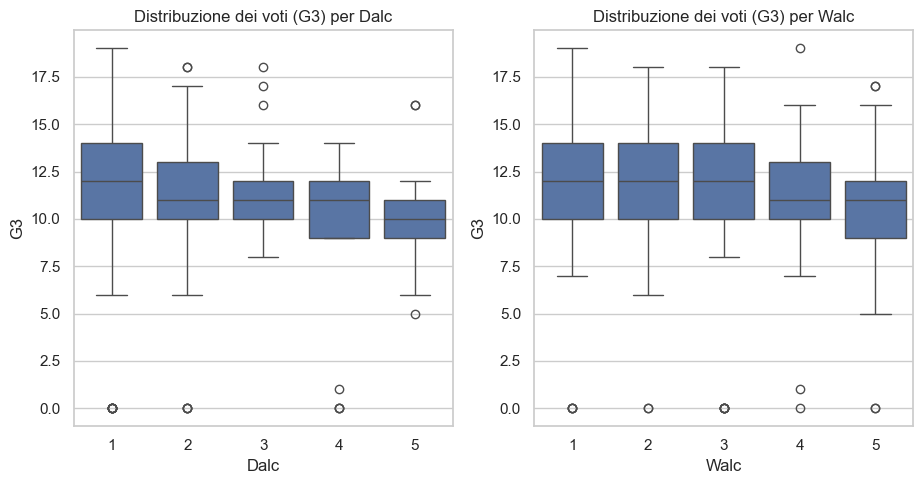

In [49]:
# Create boxplot for specific columns
boxplot_columns = ['Dalc', 'Walc'] 

boxplot(boxplot_columns)

<h5><a id="other_analysis">Ulteriori Analisi</a></h5>

Questa sezione esamina come diverse variabili influenzano la media dei voti finali, facendo emergere che l'accesso a Internet e la residenza urbana sono positivamente correlati a voti finali più alti, mentre il supporto scolastico e le relazioni sentimentali possono influenzare negativamente le prestazioni accademiche

In [50]:
# Variables of interest
binary_columns = ['internet', 'schoolsup', 'romantic', 'address']

# Generete mean of finale score for every binary variables
means = {col: por.groupby(col)['G3'].mean() for col in binary_columns}

bar_width = 0.2
index = np.arange(len(binary_columns))

fig = go.Figure()

colors = {
    'internet': ['#0b5394', '#9fc5e8'],
    'schoolsup': ['#ff9900', '#ffd966'],
    'romantic': ['#990000', '#e06666'],
    'address': ['#38761d', '#b6d7a8']
}

# Add bar for every binary variable
for i, col in enumerate(binary_columns):
    yes_mean = means[col].get('yes', means[col].get('U', np.nan))
    no_mean = means[col].get('no', means[col].get('R', np.nan))

    # Se la variabile è 'address', usa nomi personalizzati
    if col == 'address':
        yes_name = 'address - Urb'
        no_name = 'address - Rur'
    else:
        yes_name = f'{col} - y'
        no_name = f'{col} - n'

    # Barre per 'yes'
    fig.add_trace(go.Bar(
        x=[index[i] - bar_width / 2],
        y=[yes_mean],
        name=yes_name,
        marker_color=colors[col][0],
        text=[f'{yes_mean:.2f}'],
        textposition='outside',
        showlegend=True
    ))

    # Barre per 'no'
    fig.add_trace(go.Bar(
        x=[index[i] + bar_width / 2],
        y=[no_mean],
        name=no_name,
        marker_color=colors[col][1],
        text=[f'{no_mean:.2f}'],
        textposition='outside',
        showlegend=True
    ))

fig.update_layout(
    xaxis_title='Variabili',
    yaxis_title='Media dei voti finali',
    xaxis=dict(
        tickvals=index,
        ticktext=binary_columns
    ),
    barmode='group',  
    legend_title='Categorie',
    legend=dict(
        x=1.05,  
        y=1,
        traceorder='normal',  
        orientation='v',  
        bgcolor='#e0e0e0'  
    ),
    margin=dict(l=0, r=200, t=40, b=50)  # Aggiusta i margini per fare spazio alla legenda
)

fig.show()


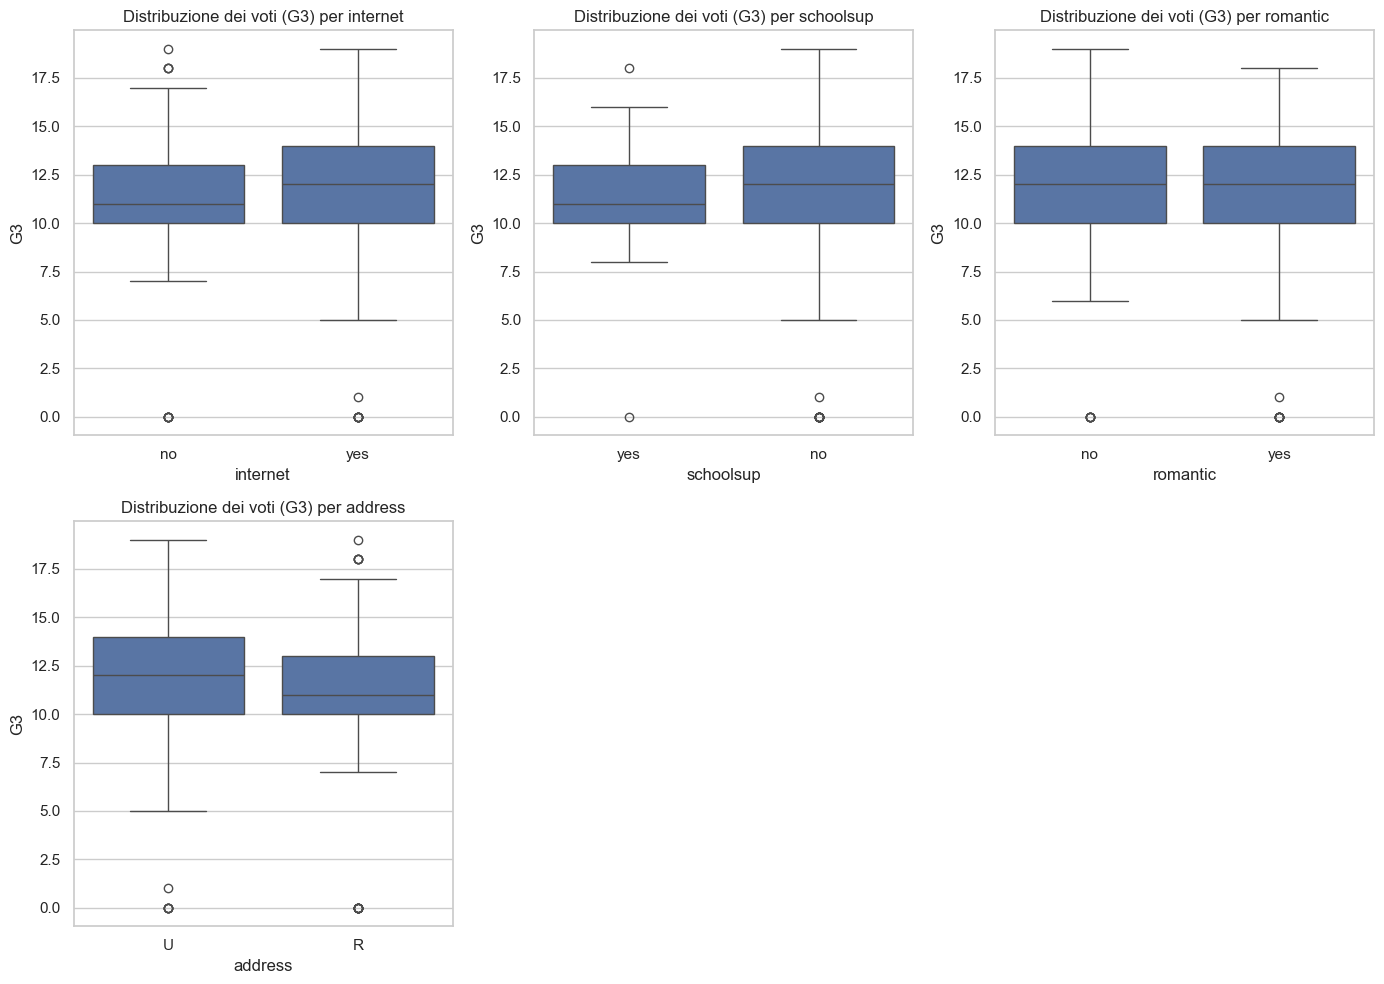

In [51]:
# Create boxplot for specific columns
boxplot(binary_columns)

<h1><a id="pa">Analisi Predittiva</a></h1>

<p>In questa fase indagheremo, tramite modelli di ML per l'apprendimento supervisionato, come predirre il voto finale (G3)</p>

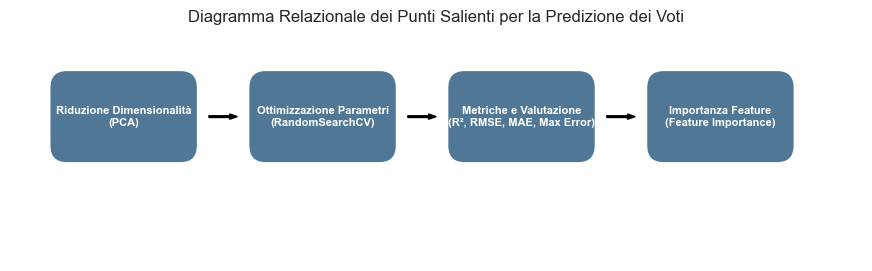

In [52]:
steps = [
    "Riduzione Dimensionalità\n(PCA)",
    "Ottimizzazione Parametri\n(RandomSearchCV)",
    "Metriche e Valutazione\n(R², RMSE, MAE, Max Error)",
    "Importanza Feature\n(Feature Importance)"
]

x = 0
y = 0
width = 2
height = 1
space = 1.5
arrow_space = 0.5

# Create fugure and axes
fig, ax = plt.subplots(figsize=(11, 3))
ax.set_xlim(-1, len(steps) * (width + space))
ax.set_ylim(-2, 2)
ax.axis('off')

# Add bocks and arrows
for i, step in enumerate(steps):
    box = FancyBboxPatch(
        (x + i * (width + space), y),
        width,
        height,
        boxstyle="round,pad=0.3",
        edgecolor='white',
        facecolor='#507796'
    )
    ax.add_patch(box)
    ax.text(
        x + i * (width + space) + width / 2,
        y + height / 2,
        step,
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        fontname='Arial',
        color='white'
    )
    if i < len(steps) - 1:
        arrow = FancyArrow(
            x + (i + 1) * (width + space) - space + arrow_space,  
            y + height / 2,
            space - 2 * arrow_space,
            0,
            width=0.03,
            length_includes_head=True,
            color='black'
        )
        ax.add_patch(arrow)

plt.title("Diagramma Relazionale dei Punti Salienti per la Predizione dei Voti", fontsize=12)
plt.show()


In [53]:
por_enc.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Per dimostrare l'efficacia di diversi algoritmi di machine learning nella previsione del voto finale, sono stati testati una gamma diversificata di modelli. Questo approccio didattico, ha permesso di:

- Apprendere come ogni algoritmo gestisce i dati e identifica le caratteristiche rilevanti

- Valutare le performance relative di ciascun modello, fornendo una comprensione pratica delle loro capacità e limitazioni

- Comprendere le differenze fondamentali tra gli algoritmi, facilitando la scelta del modello più adatto per previsioni accurate

<b>Algoritmi usati</b>

1. [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html): Algoritmo di regressione basato su Support Vector Machines. Efficace per dati di alta dimensione.

2. [GradientBoosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html): Metodo di ensemble che costruisce alberi sequenziali.
Alta accuratezza, ma richiede più tempo di addestramento.

3. [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html): Metodo di ensemble che combina multiple istanze dello stesso modello. Riduce la varianza e migliora la stabilità.

4. [RandomForest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): Algoritmo basato su ensemble di alberi decisionali.
Buona capacità di generalizzazione e gestione della variabilità nei dati.


5. [DecisionTree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): Algoritmo basato su alberi singoli. Facile interpretabilità, ma suscettibile all'overfitting.

6. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Modello di regressione lineare semplice. Base di confronto per valutare la complessità degli altri due modelli.

7. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html): Variante della regressione lineare che include una penalità. Migliora la generalizzazione riducendo l'overfitting.

8. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): Variante della regressione lineare che effettua selezione delle caratteristiche. Utile per ridurre il numero di feature rilevanti.

9. [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html): Modello di apprendimento profondo. Capacità di catturare pattern complessi nei dati, ma necessita di molti dati e tempo di addestramento.

10. [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html):Algoritmo di classificazione e regressione basato sulla vicinanza. Semplice da implementare, ma computationalmente costoso per dataset grandi.

In [54]:
# 1. Separation of features and target
X = por_enc.drop(columns=['G3'])
y = por_enc['G3']

<h3><a id="reduce_dim">Riduzione della Dimensionalità</a></h3>

In [55]:
# 2. Dimensionality Reduction

# Data normalization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

pca = PCA()
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

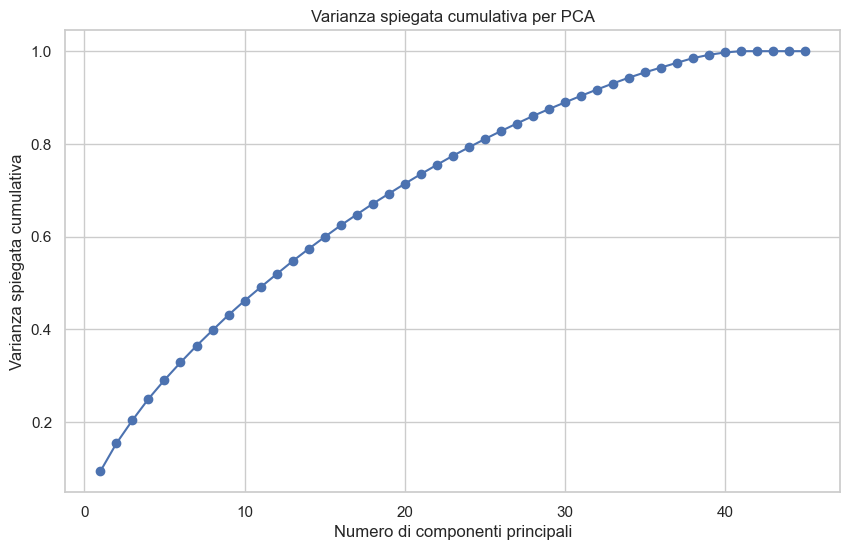

In [56]:
# Cumulative Explained Variance Plot for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [57]:
# Choose the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Dimensionality reduction with the optimal number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)


Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [58]:
# 3. Division of the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


<h3><a id="train">Ottimizzazione dei Parametri e Addestramento</a></h3>

Di seguito vengono riportati i range di valori che potranno assumere i parametri. 

Questi range verranno successivamente utilizzati dalla RandomizedSearchCV, che è stata preferita alla Grid Search per la sua capacità di esplorare ampi spazi di iperparametri in modo più efficiente e scalabile, al fine di trovare la combinazione ottimale di parametri per ciascun modello.

In [59]:
# 4. Optimization of the parameters of each model

# Definizione delle distribuzioni dei parametri

# SVR
param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}

# Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

# Bagging
param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Decision Tree
param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Linear Regression
param_dist_lr = {}

# Ridge
param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

# Lasso
param_dist_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

# Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [2000, 3000, 4000] 
}

# KNN
param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [60]:
# 5. Optimized training of each model

models = {
    'SVR': (SVR(kernel = 'rbf'), param_dist_svr),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'Bagging': (BaggingRegressor(random_state=42), param_dist_bagging),    
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'Lasso': (Lasso(random_state=42), param_dist_lasso),
    'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}

random_searches = {}
training_times = {}


In [61]:
# Disable warnings
warnings.filterwarnings("ignore", category=UserWarning)

for model_name, (model, param_dist) in models.items():
    try:
        print(f"Starting training for {model_name}")
        start_time = time.time()
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
        random_search.fit(X_train, y_train)

        end_time = time.time()

        random_searches[model_name] = random_search
        training_times[model_name] = end_time - start_time

        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Training time for {model_name}: {training_times[model_name]:.2f} seconds")
        print("------")

    except UserWarning as e:
        print(f"A UserWarning occurred while training {model_name}: {e}")
    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

warnings.filterwarnings("default", category=UserWarning)

print("Training complete for all models.")

Starting training for SVR
Best parameters for SVR: {'C': np.float64(78.06910002727692), 'epsilon': np.float64(0.696850157946487), 'gamma': np.float64(0.0013750978798220072)}
Training time for SVR: 2.58 seconds
------
Starting training for GradientBoosting
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.05286004537658223), 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 463, 'subsample': np.float64(0.7637017332034828)}
Training time for GradientBoosting: 26.71 seconds
------
Starting training for Bagging
Best parameters for Bagging: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0}
Training time for Bagging: 6.55 seconds
------
Starting training for RandomForest
Best parameters for RandomForest: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 84}
Training time for RandomForest: 6.11 seconds
------
Starting training for DecisionTree
Best parameters for DecisionTree: {'


<h3><a id="valutation">Valutazione dei Modelli e degli Errori</a></h3>

In [62]:
# 6. Prediction and evaluation of each model

In [63]:
# Assuming random_searches is a dictionary of trained models after random search
results = {}
predictions = {'Actual': y_test}

In [64]:
# Loop through each model and calculate metrics
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    
    results[model_name] = {'R^2': round(r2, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2), 'Max Err': round(max_err, 2)}
    
    # Store predictions and errors
    predictions[f'{model_name}_Predicted'] = y_pred
    predictions[f'{model_name}_Error'] = np.abs(y_test - y_pred)



In [65]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T

# Add training times
training_times_df = pd.Series(training_times, name="Train Time (s)")
results_df = results_df.join(training_times_df)

In [66]:
print(tabulate(results_df, headers='keys', tablefmt='github'))

|                  |   R^2 |   RMSE |   MAE |   Max Err |   Train Time (s) |
|------------------|-------|--------|-------|-----------|------------------|
| SVR              |  0.81 |   1.36 |  0.87 |     10.22 |        2.58108   |
| GradientBoosting |  0.69 |   1.74 |  1.22 |      7.51 |       26.7114    |
| Bagging          |  0.59 |   2.01 |  1.47 |      8.46 |        6.54667   |
| RandomForest     |  0.6  |   1.98 |  1.45 |      8.55 |        6.11127   |
| DecisionTree     |  0.45 |   2.32 |  1.76 |     10.26 |        0.247722  |
| LinearRegression |  0.8  |   1.41 |  0.96 |      9.99 |        0.0133348 |
| Ridge            |  0.8  |   1.4  |  0.95 |      9.94 |        0.125359  |
| Lasso            |  0.8  |   1.4  |  0.95 |      9.9  |        0.104556  |
| NeuralNetwork    |  0.71 |   1.67 |  1.19 |      9.44 |       18.4083    |
| KNN              |  0.48 |   2.24 |  1.69 |     10.37 |        0.0655501 |


In [67]:
predictions_df = pd.DataFrame(predictions)

# Save the predictions and errors to a CSV file
#predictions_df.to_csv('predictions_and_errors.csv', index=False)

Dopo aver estratto il dataframe con i valori reali del dataset di test, i valori previsti e gli errori commessi dai vari algoritmi di ML, abbiamo sommato tutti gli errori per identificare i dati sui quali gli algoritmi hanno commesso errori maggiori.

In [68]:
predictions_df['tot_err'] = predictions_df[['GradientBoosting_Error', 'Bagging_Error', 'RandomForest_Error', 'DecisionTree_Error', 'LinearRegression_Error','Ridge_Error', 'Lasso_Error', 'NeuralNetwork_Error','KNN_Error']].sum(axis=1)

In [69]:
predictions_df.sort_values('tot_err', ascending=False).head(10)

,Actual,SVR_Predicted,SVR_Error,GradientBoosting_Predicted,GradientBoosting_Error,Bagging_Predicted,Bagging_Error,RandomForest_Predicted,RandomForest_Error,DecisionTree_Predicted,...,LinearRegression_Error,Ridge_Predicted,Ridge_Error,Lasso_Predicted,Lasso_Error,NeuralNetwork_Predicted,NeuralNetwork_Error,KNN_Predicted,KNN_Error,tot_err
163,0,10.222331,10.222331,7.507061,7.507061,8.46,8.46,7.733798,7.733798,10.263158,...,9.985148,9.942990,9.942990,9.897772,9.897772,9.444145,9.444145,10.369434,10.369434,83.603507
603,0,3.303639,3.303639,7.034934,7.034934,8.27,8.27,8.547740,8.547740,8.851852,...,2.671429,2.837041,2.837041,2.934107,2.934107,0.324791,0.324791,8.803062,8.803062,50.274956
636,19,17.229355,1.770645,13.626662,5.373338,13.81,5.19,13.788740,5.211260,13.300000,...,1.359242,17.577220,1.422780,17.540991,1.459009,14.598725,4.401275,14.976458,4.023542,34.140447
557,10,8.173704,1.826296,5.218202,4.781798,5.90,4.10,6.966077,3.033923,5.380952,...,2.840840,7.187843,2.812157,7.108138,2.891862,6.819600,3.180400,8.421001,1.578999,29.839027
244,12,14.387015,2.387015,15.037449,3.037449,14.83,2.83,15.013741,3.013741,16.400000,...,2.305004,14.307910,2.307910,14.298940,2.298940,14.821140,2.821140,14.203271,2.203271,25.217455
344,17,18.629055,1.629055,13.684678,3.315322,13.19,3.81,13.362171,3.637829,13.300000,...,1.981216,18.883160,1.883160,18.892641,1.892641,17.904215,0.904215,14.788753,2.211247,23.335631
642,11,8.073439,2.926561,10.779538,0.220462,12.71,1.71,12.863021,1.863021,12.687500,...,3.764147,7.329182,3.670818,7.397831,3.602169,5.326704,5.673296,11.309658,0.309658,22.501071
349,18,19.093307,1.093307,16.093724,1.906276,15.21,2.79,15.081725,2.918275,14.166667,...,1.545094,19.462208,1.462208,19.459984,1.459984,15.041073,2.958927,15.350808,2.649192,21.523288
522,8,9.618250,1.618250,11.257211,3.257211,11.40,3.40,11.343041,3.343041,10.384615,...,0.413744,8.475324,0.475324,8.537972,0.537972,9.750817,1.750817,13.633456,5.633456,21.196181
361,10,12.337171,2.337171,12.393236,2.393236,12.39,2.39,12.380750,2.380750,12.687500,...,1.598894,11.622746,1.622746,11.587188,1.587188,12.722081,2.722081,13.797628,3.797628,21.180024


In [70]:
predictions_df[predictions_df.Actual == 0]

,Actual,SVR_Predicted,SVR_Error,GradientBoosting_Predicted,GradientBoosting_Error,Bagging_Predicted,Bagging_Error,RandomForest_Predicted,RandomForest_Error,DecisionTree_Predicted,...,LinearRegression_Error,Ridge_Predicted,Ridge_Error,Lasso_Predicted,Lasso_Error,NeuralNetwork_Predicted,NeuralNetwork_Error,KNN_Predicted,KNN_Error,tot_err
163,0,10.222331,10.222331,7.507061,7.507061,8.46,8.46,7.733798,7.733798,10.263158,...,9.985148,9.942990,9.942990,9.897772,9.897772,9.444145,9.444145,10.369434,10.369434,83.603507
603,0,3.303639,3.303639,7.034934,7.034934,8.27,8.27,8.547740,8.547740,8.851852,...,2.671429,2.837041,2.837041,2.934107,2.934107,0.324791,0.324791,8.803062,8.803062,50.274956


In [71]:
por.iloc[[163, 603]]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,11,9,0
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0


Dopo aver effettuato le analisi necessarie, è emerso che gli algoritmi hanno maggiori difficoltà nel prevedere il voto 0. 

In particolare, nel caso della prima riga, anche un esperto umano potrebbe trovare difficile individuare il risultato corretto.

<h3><a id="f_importance">Importanza delle features</a></h3>


In [72]:
# 7. Visualization of feature importance

Come ultimo step per questo progetto, viene mostrata una visualizzazione dell'importanza delle feature, strumento chiave nell'analisi dei modelli di ML, per una comprensione a tutto tondo del modello stesso con 


In [73]:
feature_labels = X_scaled.columns
feature_importances_dict = {}

In [74]:
# Extract feature importances for each model
for model_name, search in random_searches.items():
    if hasattr(search.best_estimator_, 'feature_importances_'):
        # For models that have the 'feature_importances_' attribute
        feature_importances_dict[model_name] = search.best_estimator_.feature_importances_
    elif hasattr(search.best_estimator_, 'coef_'):
        # For models that have the 'coef_' attribute (such as linear models)
        feature_importances_dict[model_name] = np.abs(search.best_estimator_.coef_)

# Creation of the Feature Importances DataFrame
# For models that use PCA, you need to map the principal component importances to the original features
def get_feature_importances_from_pca(pca, feature_importances_dict, original_feature_labels):
    component_loadings = pca.components_.T
    importance_dict = {}
    for model_name, importances in feature_importances_dict.items():
        if isinstance(importances, np.ndarray) and len(importances) == pca.n_components_:
            # Importances of the main components
            importances_matrix = np.dot(component_loadings, np.diag(importances))
            # Calculate the total importance for each feature
            feature_importances = np.abs(importances_matrix).sum(axis=1)
            importance_dict[model_name] = feature_importances
        else:
            # Models without importances or incompatible importances
            importance_dict[model_name] = np.nan * len(original_feature_labels)
    return pd.DataFrame(importance_dict, index=original_feature_labels)


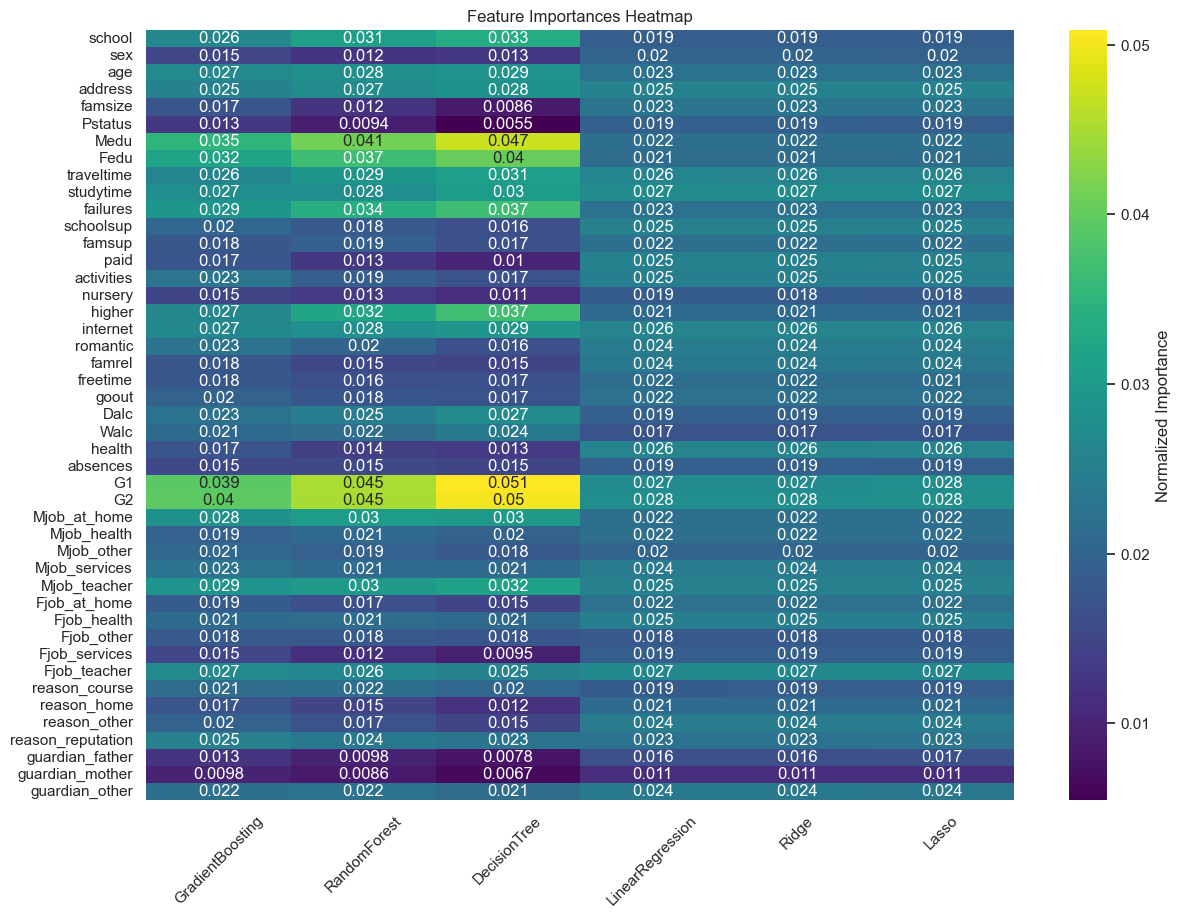

In [75]:
feature_importances_df = get_feature_importances_from_pca(pca, feature_importances_dict, feature_labels)

# Normalization of feature importances
feature_importances_df = feature_importances_df.apply(lambda x: x / np.nansum(x), axis=0)

# Heatmap plot
plt.figure(figsize=(14, 10))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Importance'})
plt.title('Feature Importances Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45) 
plt.show()

<h5>Importanza delle Features - Considerazioni</h5>

Analisi per Modelli
<ul>
    <li>
    <b>Linear Regression, Ridge e Lasso</b>: <br>
    Questi modelli mostrano che l'importanza complessiva delle feature è più distribuita, riflettendo la loro natura lineare
    </li>
    <li>
    <b>Gradient Boosting, Random Forest, Decision Tree</b>: <br> 
    Questi modelli tendono ad assegnare importanze differenti alle feature, riflettendo la loro capacità di catturare relazioni non lineari e interazioni tra features.
    </li>
</ul>

Analisi per Features

<ul>
<li>Le features come G1 e G2 hanno le importanze più alte in tutti i modelli, indicando che i voti precedenti sono i predittori più forti per il voto finale G3.</li>
<li>Altre features che appaiono frequentemente con importanza significativa sono Medu e Fedu, suggerendo che il background educativo dei genitori è rilevante.</li>
<li>Pstatus, nursery e guardian hanno importanze molto basse in tutti i modelli, suggerendo che non sono un fattore critico per predire i voti.</li>
</ul>